In [1]:
import os
os.chdir("..")

from src.data import extract
from src.visualization import plots
from src.descriptors import gray_level_histogram, lab_chroma_histogram, hsv_hue_weighted_histogram, concatenate_histogram, ycbcr_histogram
from src.distances import bhattacharyya, canberra, chi_2, euclidean, jensen_shannon, l1, cosine, hellinger, histogram_intersection

# Paths
BBDD_DIR = "data/raw/BBDD"
QSD1_DIR = "data/raw/qsd1_w1"

# Content Based Image Retrieval - Week 1

This notebook explores the museum dataset (BBDD) and the query set (QSD1).  
We:
- Visualize some sample images.
- Convert them to different colour spaces (Gray, HSV, Lab).
- Plot their histograms according to our descriptors.
- Compute similarity distances between selected BBDD images and one query image.

This helps us understand how our descriptors behave before doing full retrieval and mAP evaluation.

1. [BBDD Dataset](#1-bbdd-dataset)
    - 1.1 [Gray-level Histogram](#11-gray-level-histogram)
        - 1.1.1 [Image bbdd_00000.jpg](#111-image-bbdd_00000jpg)
        - 1.1.2 [Image bbdd_00013.jpg](#112-image-bbdd_00013jpg)
        - 1.1.3 [Image bbdd_00045.jpg](#113-image-bbdd_00045jpg)
    - 1.2 [HSV Hue Weighted Histogram](#12-hsv-hue-weighted-histogram)
        - 1.2.1 [Image bbdd_00000.jpg](#121-image-bbdd_00000jpg)
        - 1.2.2 [Image bbdd_00013.jpg](#122-image-bbdd_00013jpg)
        - 1.2.3 [Image bbdd_00045.jpg](#123-image-bbdd_00045jpg)
    - 1.3 [CieLab Chroma Histogram](#13-cielab-chroma-histogram)
        - 1.3.1 [Image bbdd_00000.jpg](#131-image-bbdd_00000jpg)
        - 1.3.2 [Image bbdd_00013.jpg](#132-image-bbdd_00013jpg)
        - 1.3.3 [Image bbdd_00045.jpg](#133-image-bbdd_00045jpg)
    - 1.4 [Concatenated RGB Histogram](#14-concatenated-rgb-histogram)
        - 1.4.1 [Image bbdd_00000.jpg](#141-image-bbdd_00000jpg)
        - 1.4.2 [Image bbdd_00013.jpg](#142-image-bbdd_00013jpg)
        - 1.4.3 [Image bbdd_00045.jpg](#143-image-bbdd_00045jpg)

2. [QSD1 Dataset](#2-qsd1-dataset)
    - 2.1 [Gray-level Histogram](#21-gray-level-histogram)
        - 2.1.1 [Image 00000.jpg](#211-image-00000jpg)
    - 2.2 [HSV Hue Weighted Histogram](#22-hsv-hue-weighted-histogram)
        - 2.2.1 [Image 00000.jpg](#221-image-00000jpg)
    - 2.3 [CieLab Chroma Histogram](#23-cielab-chroma-histogram)
        - 2.3.1 [Image 00000.jpg](#231-image-00000jpg)
    - 2.4 [YCbCr Histogram](#24-ycbcr-histogram)
        - 2.4.1 [Image 00000.jpg](#241-image-00000jpg)
    - 2.5 [Concatenated RGB Histogram](#25-concatenated-rgb-histogram)
        - 2.5.1 [Image 00000.jpg](#251-image-00000jpg)

3. [Similarity Metrics between BBDD and QSD1](#3-similarity-metrics-between-bbdd-and-qsd1)
    - 3.1 [Euclidean Distance](#31-euclidean-distance)
    - 3.2 [L1 Distance](#32-l1-distance)
    - 3.3 [Cosine Similarity](#33-cosine-similarity)
    - 3.4 [Hellinger Distance](#34-hellinger-distance)
    - 3.5 [Chi-squared Distance](#35-chi-squared-distance)
    - 3.6 [Histogram Intersection](#36-histogram-intersection)
    - 3.7 [Bhattacharyya Distance](#37-bhattacharyya-distance)
    - 3.8 [Canberra Distance](#38-canberra-distance)
    - 3.9 [Jeffrey Divergence](#39-jeffrey-divergence)

## 1. BBDD dataset




### 1.1 Gray-level Histogram

#### 1.1.1 Image `bbdd_00000.jpg`

In [2]:
image1_filepath = os.path.join(BBDD_DIR, "bbdd_00000.jpg")

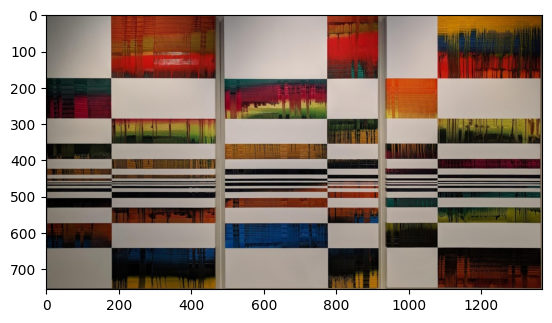

In [3]:
img1 = extract.read_image(image1_filepath)
plots.display_image(img1)

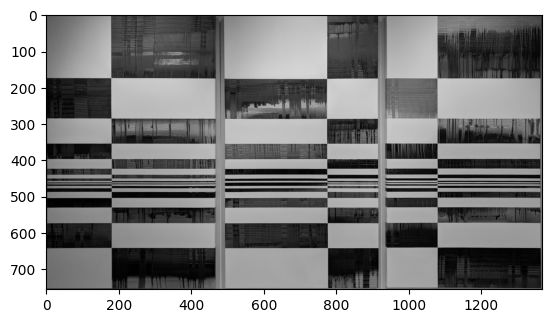

In [4]:
img1_gray = gray_level_histogram.convert_img_to_gray_scale(img1)
plots.display_image(img1_gray)

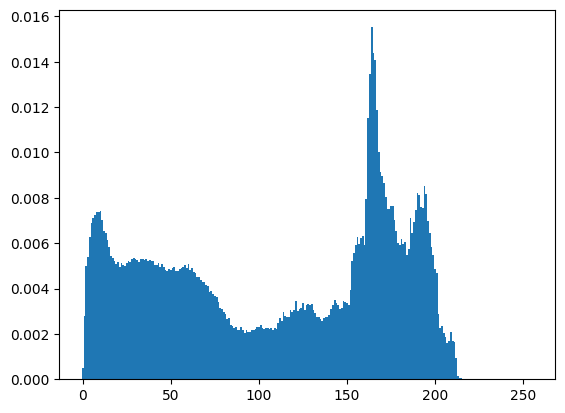

In [5]:
hist1_gray, bin_edges = gray_level_histogram.compute_histogram(img1_gray)
plots.display_histogram(hist1_gray, bin_edges)



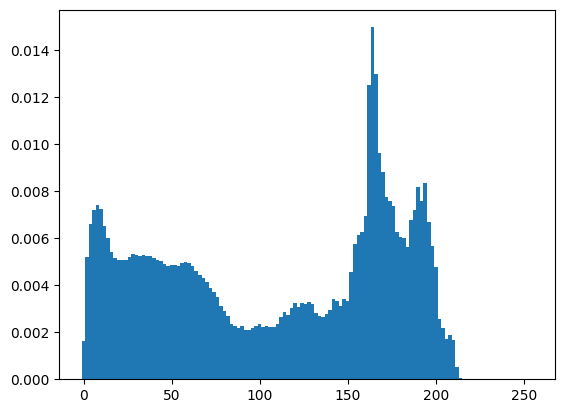

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]


In [6]:
hist1_gray_2valsbin, bin_edges = gray_level_histogram.compute_histogram(img1_gray, values_per_bin=2)
plots.display_histogram(hist1_gray_2valsbin, bin_edges)
print(bin_edges[:10])

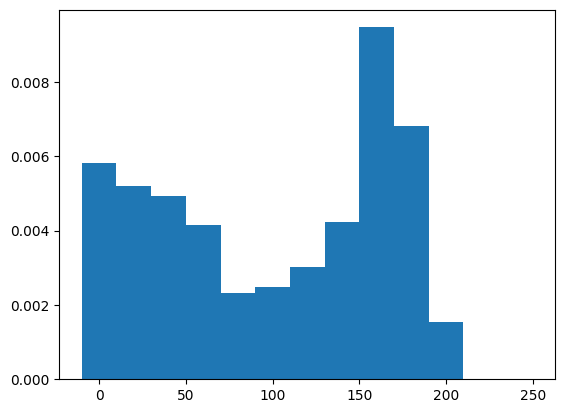

[  0.  20.  40.  60.  80. 100. 120. 140. 160. 180.]


In [7]:
hist1_gray_20valsbin, bin_edges = gray_level_histogram.compute_histogram(img1_gray, values_per_bin=20)
plots.display_histogram(hist1_gray_20valsbin, bin_edges)
print(bin_edges[:10])

#### 1.1.2 Image `bbdd_00013.jpg`

In [8]:
image2_filepath = os.path.join(BBDD_DIR, "bbdd_00013.jpg")

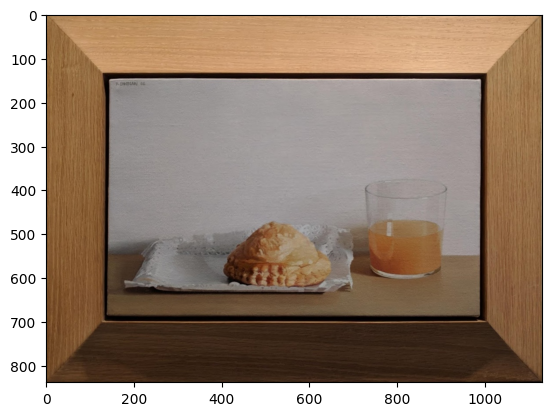

In [9]:
img2 = extract.read_image(image2_filepath)
plots.display_image(img2)

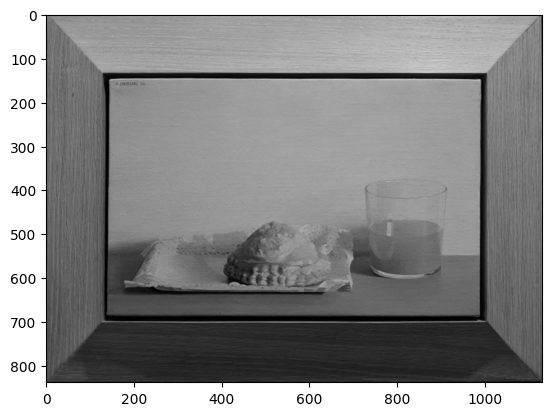

In [10]:
img2_gray = gray_level_histogram.convert_img_to_gray_scale(img2)
plots.display_image(img2_gray)

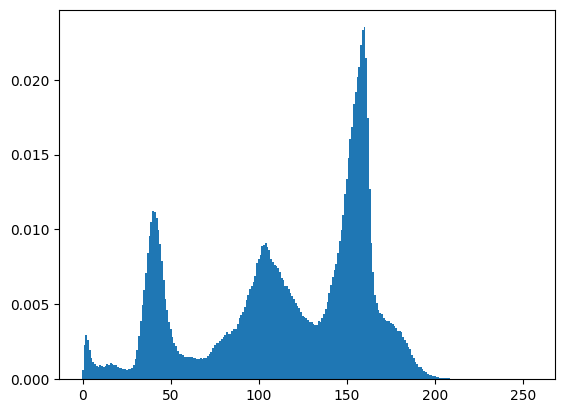

In [11]:
hist2_gray, bin_edges = gray_level_histogram.compute_histogram(img2_gray)
plots.display_histogram(hist2_gray, bin_edges)

#### 1.1.3 Image `bbdd_00045.jpg`

In [12]:
image3_filepath = os.path.join(BBDD_DIR, "bbdd_00045.jpg")

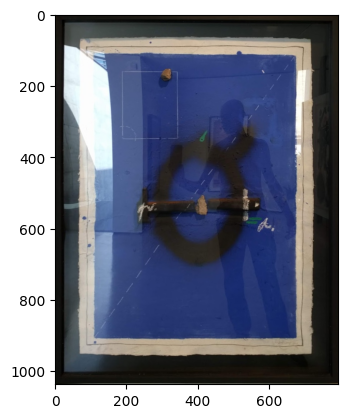

In [13]:
img3 = extract.read_image(image3_filepath)
plots.display_image(img3)

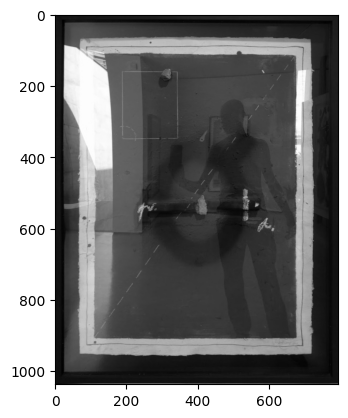

In [14]:
img3_gray = gray_level_histogram.convert_img_to_gray_scale(img3)
plots.display_image(img3_gray)

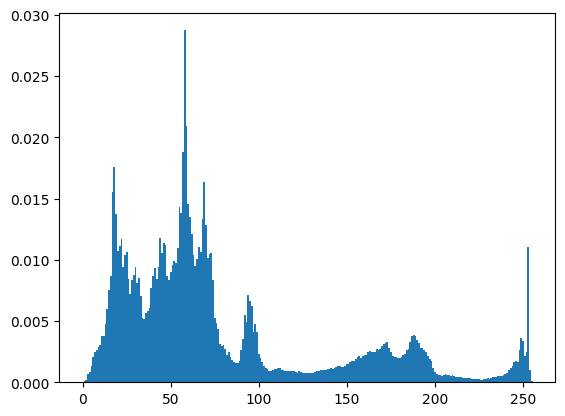

In [15]:
hist3_gray, bin_edges = gray_level_histogram.compute_histogram(img3_gray)
plots.display_histogram(hist3_gray, bin_edges)

### 1.2 HSV Hue-Weighted Histogram


#### 1.2.1 Image `bbdd_000000.jpg`

In [16]:
image1_filepath = os.path.join(BBDD_DIR, "bbdd_00000.jpg")

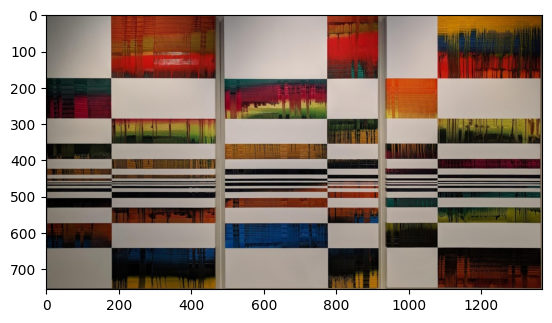

In [17]:
img1 = extract.read_image(image1_filepath)
plots.display_image(img1)

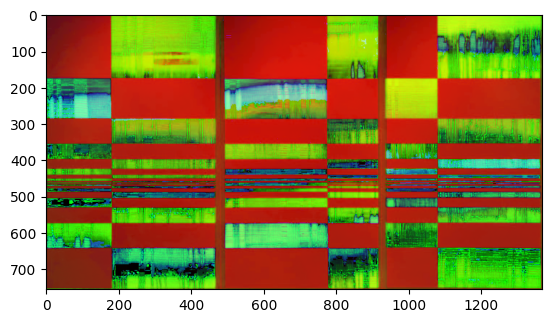

In [18]:
img1_hsv = hsv_hue_weighted_histogram.convert_img_to_hsv(img1)
plots.display_image(img1_hsv)

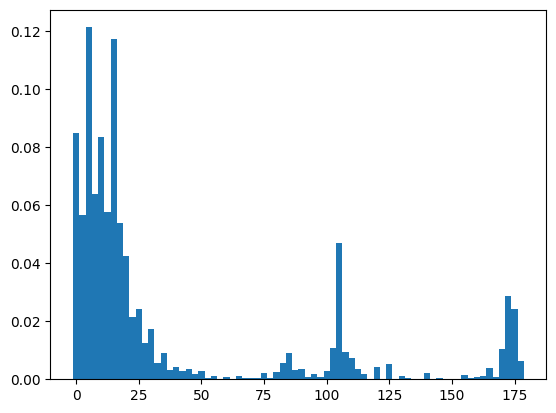

In [19]:
hist1_hsv, bin_edges = hsv_hue_weighted_histogram.compute_histogram(img1_hsv)
plots.display_histogram(hist1_hsv, bin_edges)


#### 1.2.2 Image `bbdd_00013.jpg`

In [20]:
image2_filepath = os.path.join(BBDD_DIR, "bbdd_00013.jpg")

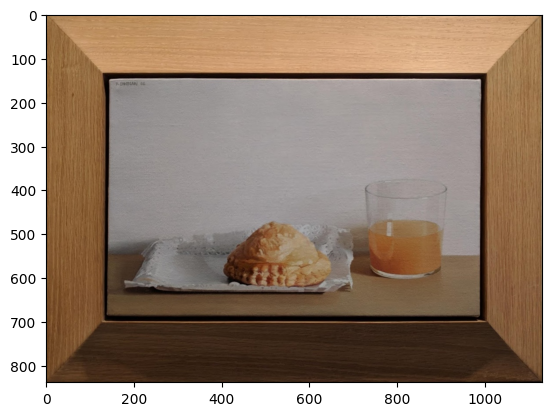

In [21]:
img2 = extract.read_image(image2_filepath)
plots.display_image(img2)

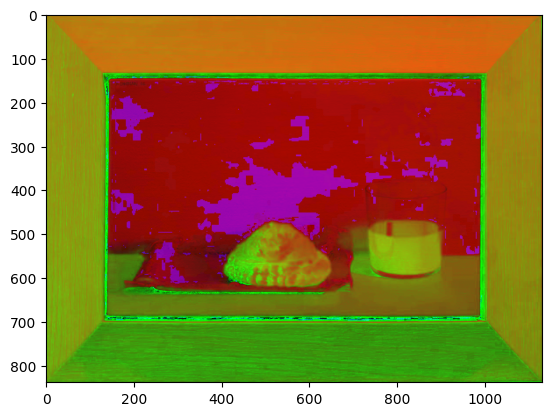

In [22]:
img2_hsv = hsv_hue_weighted_histogram.convert_img_to_hsv(img2)
plots.display_image(img2_hsv)

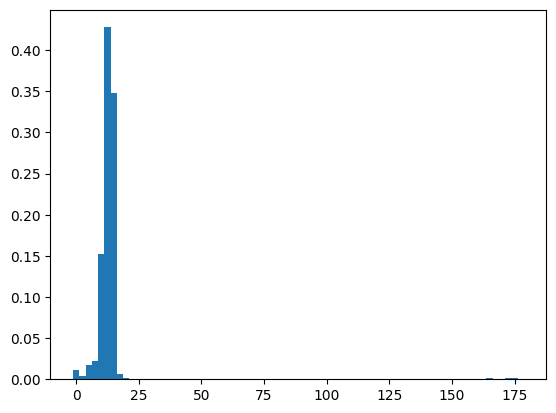

In [23]:
hist2_hsv, bin_edges = hsv_hue_weighted_histogram.compute_histogram(img2_hsv)
plots.display_histogram(hist2_hsv, bin_edges)

#### 1.2.3 Image `bbdd_00045.jpg`

In [24]:
image3_filepath = os.path.join(BBDD_DIR, "bbdd_00045.jpg")

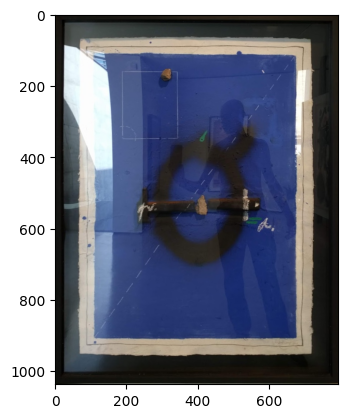

In [25]:
img3 = extract.read_image(image3_filepath)
plots.display_image(img3)

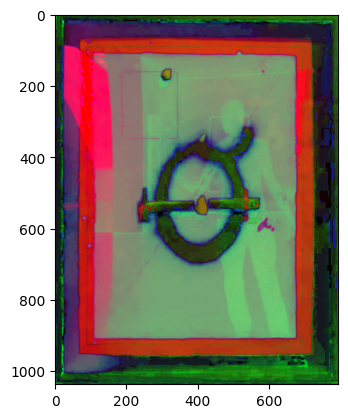

In [26]:
img3_hsv = hsv_hue_weighted_histogram.convert_img_to_hsv(img3)
plots.display_image(img3_hsv)

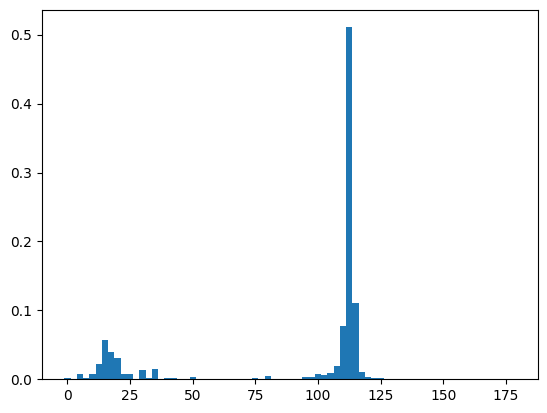

In [27]:
hist3_hsv, bin_edges = hsv_hue_weighted_histogram.compute_histogram(img3_hsv)
plots.display_histogram(hist3_hsv, bin_edges)

### 1.3 CieLab Chroma Histogram

#### 1.3.1 Image `bbdd_00000.jpg`

In [28]:
image1_filepath = os.path.join(BBDD_DIR, "bbdd_00000.jpg")

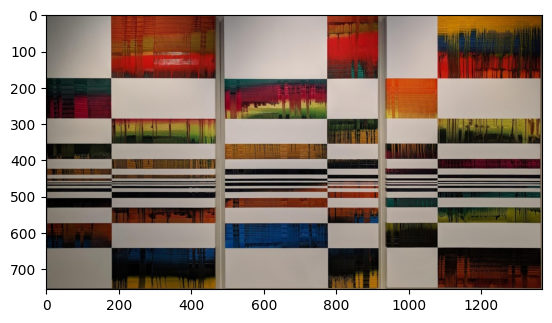

In [29]:
img1 = extract.read_image(image1_filepath)
plots.display_image(img1)

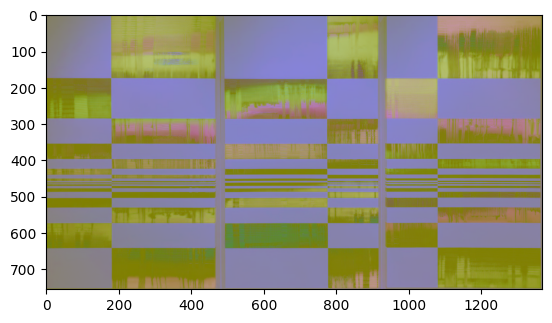

In [30]:
img1_lab = lab_chroma_histogram.convert_img_to_lab(img1)
plots.display_image(img1_lab)

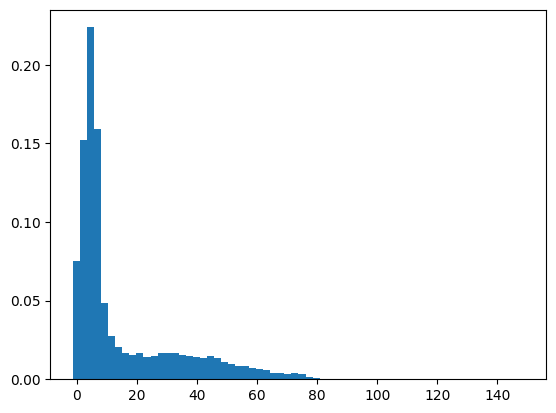

In [31]:
hist1_lab, bin_edges = lab_chroma_histogram.compute_histogram(img1_lab)
plots.display_histogram(hist1_lab, bin_edges)


#### 1.3.2 Image `bbdd_00013.jpg`

In [32]:
image2_filepath = os.path.join(BBDD_DIR, "bbdd_00013.jpg")

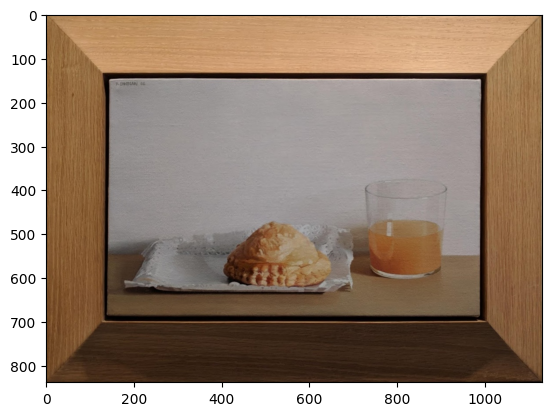

In [33]:
img2 = extract.read_image(image2_filepath)
plots.display_image(img2)

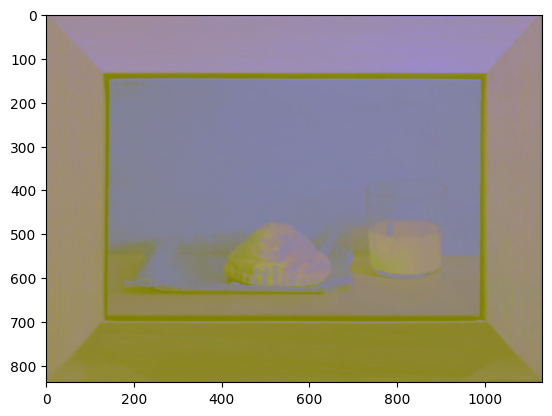

In [34]:
img2_lab = lab_chroma_histogram.convert_img_to_lab(img2)
plots.display_image(img2_lab)

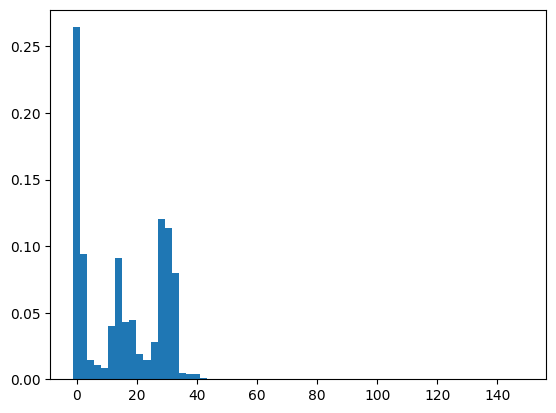

In [35]:
hist2_lab, bin_edges = lab_chroma_histogram.compute_histogram(img2_lab)
plots.display_histogram(hist2_lab, bin_edges)

#### 1.3.3 Image `bbdd_00045.jpg`

In [36]:
image3_filepath = os.path.join(BBDD_DIR, "bbdd_00045.jpg")

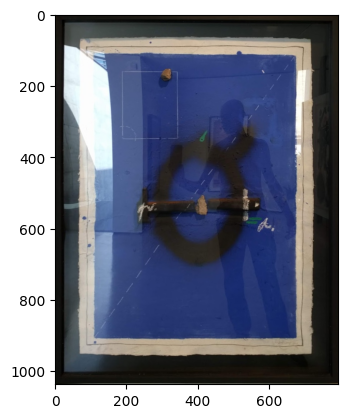

In [37]:
img3 = extract.read_image(image3_filepath)
plots.display_image(img3)

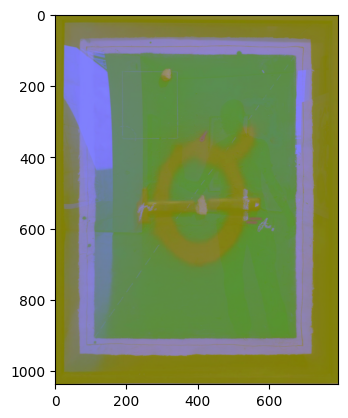

In [38]:
img3_lab = lab_chroma_histogram.convert_img_to_lab(img3)
plots.display_image(img3_lab)

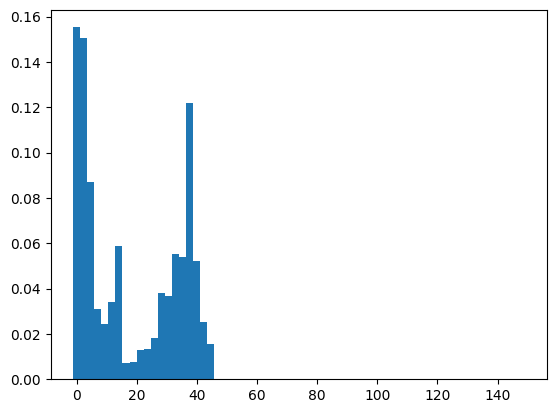

In [39]:
hist3_lab, bin_edges = lab_chroma_histogram.compute_histogram(img3_lab)
plots.display_histogram(hist3_lab, bin_edges)

### 1.4 Concatenated RGB Histogram

#### 1.4.1 Image `bbdd_00000.jpg`

In [40]:
image1_filepath = os.path.join(BBDD_DIR, "bbdd_00000.jpg")

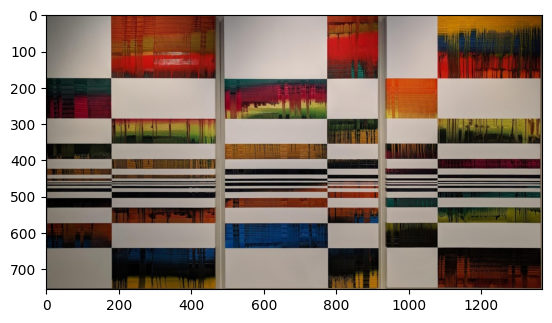

In [41]:
img1 = extract.read_image(image1_filepath)
plots.display_image(img1)

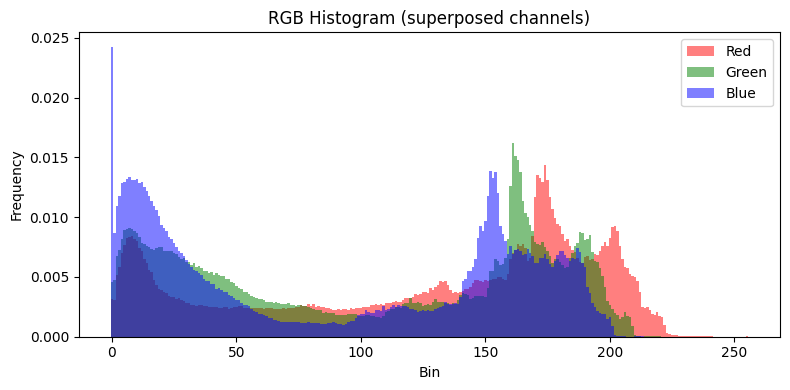

In [42]:
hist1_rgb, bin_edges = concatenate_histogram.compute_rgb_histogram(img1)
plots.display_rgb_histogram(hist1_rgb, bin_edges)

#### 1.4.2 Image `bbdd_00013.jpg`

In [43]:
image2_filepath = os.path.join(BBDD_DIR, "bbdd_00013.jpg")

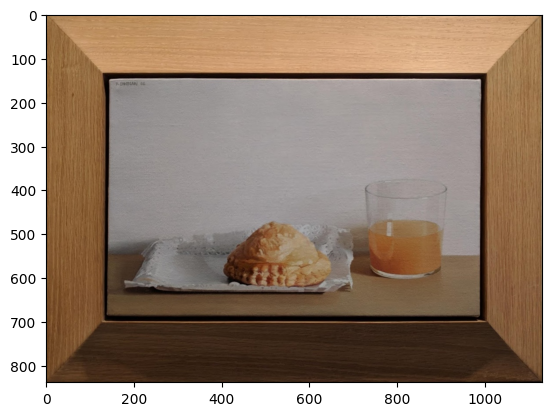

In [44]:
img2 = extract.read_image(image2_filepath)
plots.display_image(img2)

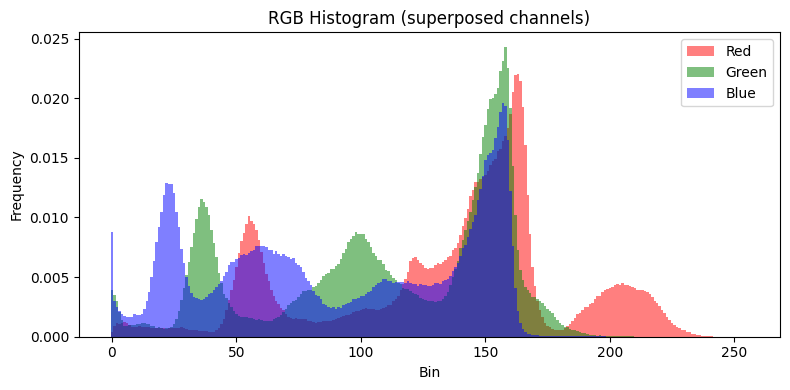

In [45]:
hist2_rgb, bin_edges = concatenate_histogram.compute_rgb_histogram(img2)
plots.display_rgb_histogram(hist2_rgb, bin_edges)

#### 1.4.3 Image `bbdd_00045.jpg`

In [46]:
image3_filepath = os.path.join(BBDD_DIR, "bbdd_00045.jpg")

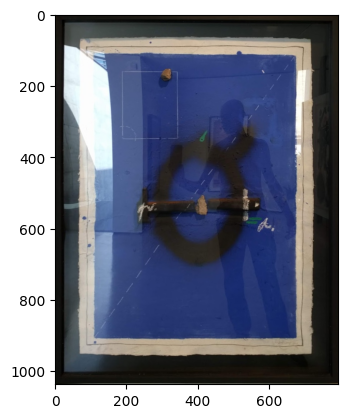

In [47]:
img3 = extract.read_image(image3_filepath)
plots.display_image(img3)

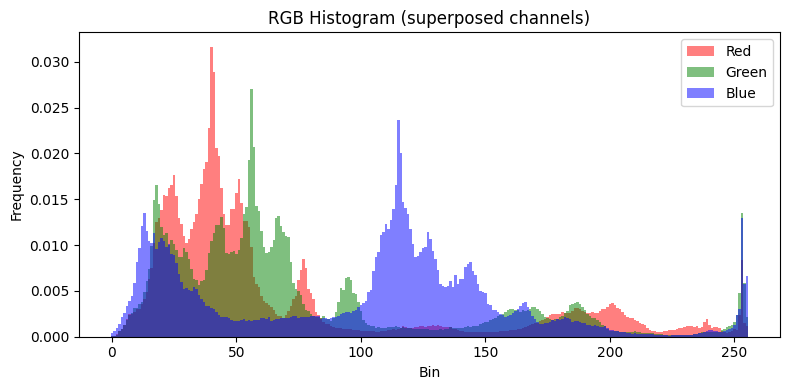

In [48]:
hist3_rgb, bin_edges = concatenate_histogram.compute_rgb_histogram(img3)
plots.display_rgb_histogram(hist3_rgb, bin_edges)

## 2. QSD1 dataset

### 2.1 Gray-level Histogram

#### 2.1.1 Image `00000.jpg`

In [49]:
image4_filepath = os.path.join(QSD1_DIR, "00000.jpg")

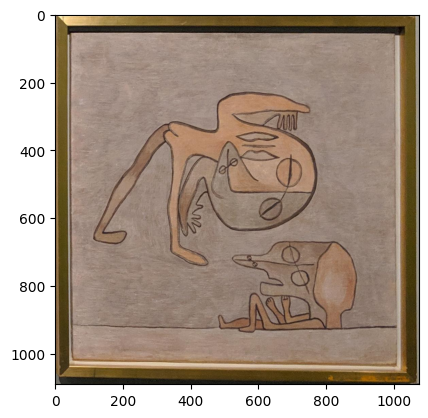

In [50]:
img4 = extract.read_image(image4_filepath)
plots.display_image(img4)

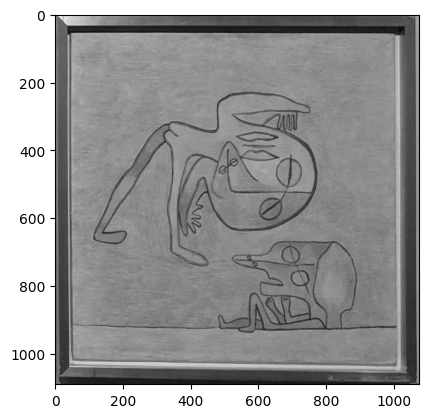

In [51]:
img4_gray = gray_level_histogram.convert_img_to_gray_scale(img4)
plots.display_image(img4_gray)

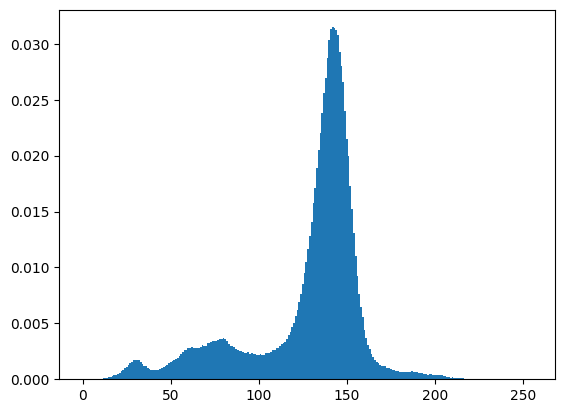

In [52]:
hist4_gray, bin_edges = gray_level_histogram.compute_histogram(img4_gray)
plots.display_histogram(hist4_gray, bin_edges)

### 2.2 HSV Hue-Weighted Histogram

### 2.2.1 Image `00000.jpg`

In [53]:
image4_filepath = os.path.join(QSD1_DIR, "00000.jpg")

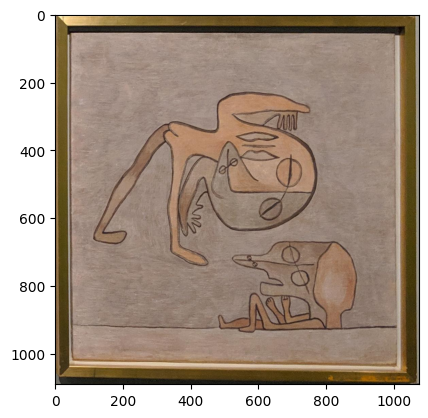

In [54]:
img4 = extract.read_image(image4_filepath)
plots.display_image(img4)

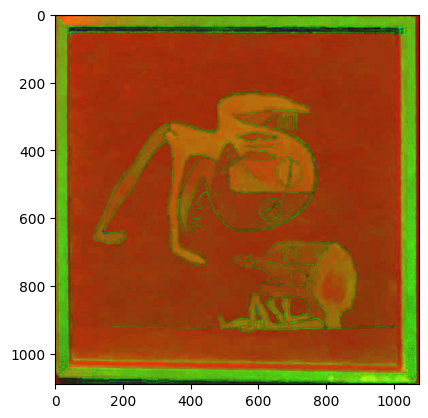

In [55]:
img4_hsv = hsv_hue_weighted_histogram.convert_img_to_hsv(img4)
plots.display_image(img4_hsv)

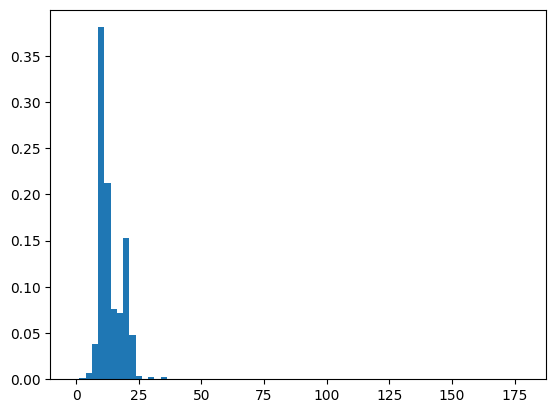

In [56]:
hist4_hsv, bin_edges = hsv_hue_weighted_histogram.compute_histogram(img4_hsv)
plots.display_histogram(hist4_hsv, bin_edges)

### 2.3 CieLab Chroma Histogram

#### 2.3.1 Image `00000.jpg`

In [57]:
image4_filepath = os.path.join(QSD1_DIR, "00000.jpg")

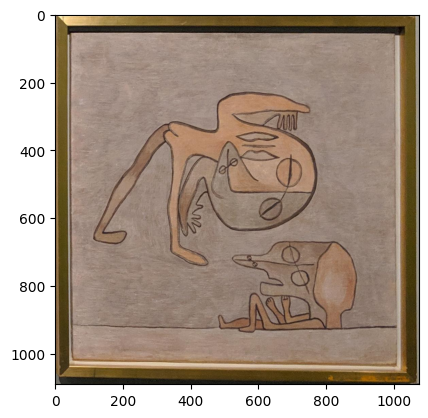

In [58]:
img4 = extract.read_image(image4_filepath)
plots.display_image(img4)

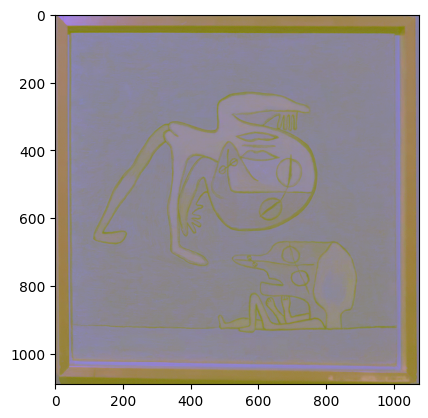

In [59]:
img4_lab = lab_chroma_histogram.convert_img_to_lab(img4)
plots.display_image(img4_lab)

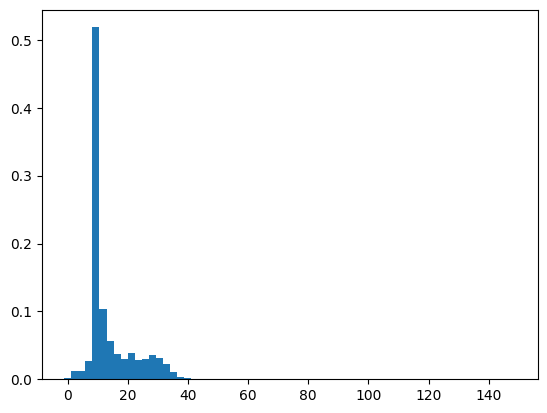

In [60]:
hist4_lab, bin_edges = lab_chroma_histogram.compute_histogram(img4_lab)
plots.display_histogram(hist4_lab, bin_edges)

### 2.4 YCbCr Histogram

#### 2.4.1 Image `00000.jpg`

In [61]:
image4_filepath = os.path.join(QSD1_DIR, "00000.jpg")

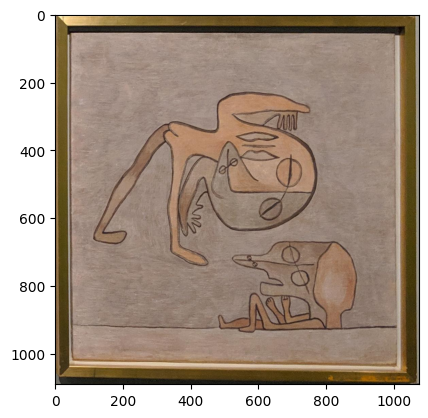

In [62]:
img4 = extract.read_image(image4_filepath)
plots.display_image(img4)

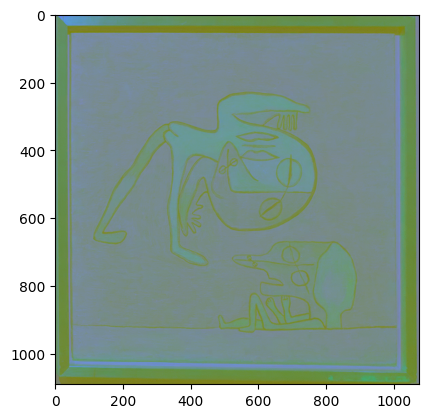

In [63]:
img4_ycbcr = ycbcr_histogram.convert_img_to_ycbcr(img4)
plots.display_image(img4_ycbcr)

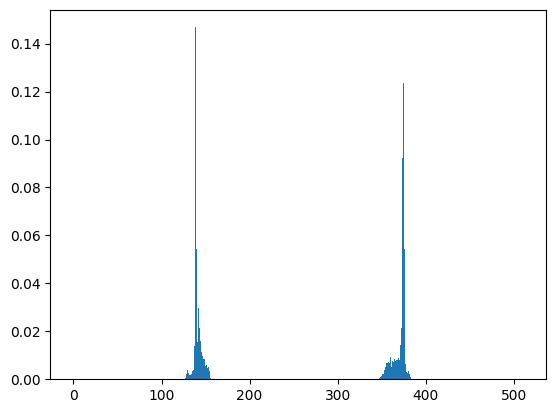

In [64]:
hist4_ycbcr, bin_edges = ycbcr_histogram.compute_histogram(img4_ycbcr)
plots.display_histogram(hist4_ycbcr, bin_edges)

### 2.5 Concatenated RGB Histogram

#### 2.5.1 Image `00000.jpg`

In [65]:
image4_filepath = os.path.join(QSD1_DIR, "00000.jpg")

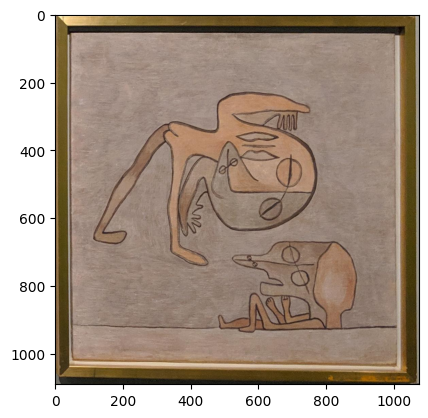

In [66]:
img4 = extract.read_image(image4_filepath)
plots.display_image(img4)

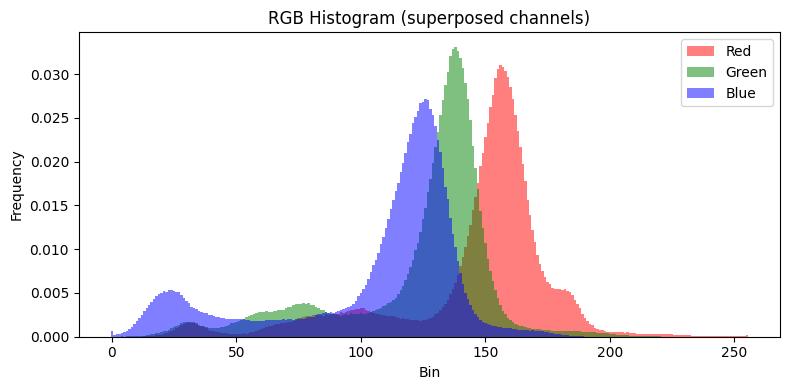

In [67]:
# Concatenated RGB Histogram for QSD1 00000.jpg
hist4_rgb, bin_edges = concatenate_histogram.compute_rgb_histogram(img4)
plots.display_rgb_histogram(hist4_rgb, bin_edges)

## 3. Similarity Metrics between BBDD and QSD1

### 3.1 Euclidean Distance

In [68]:
# Gray-scale
print(euclidean.compute_euclidean_distance(hist1_gray, hist4_gray))
print(euclidean.compute_euclidean_distance(hist2_gray, hist4_gray))
print(euclidean.compute_euclidean_distance(hist3_gray, hist4_gray))

0.12437798034460242
0.10887605840856679
0.1447844861447131


In [69]:
# HSV Hue Weighted
print(euclidean.compute_euclidean_distance(hist1_hsv, hist4_hsv))
print(euclidean.compute_euclidean_distance(hist2_hsv, hist4_hsv))
print(euclidean.compute_euclidean_distance(hist3_hsv, hist4_hsv))

0.39559004
0.45001513
0.6888064


In [70]:
# CieLab Chroma
print(euclidean.compute_euclidean_distance(hist1_lab, hist4_lab))
print(euclidean.compute_euclidean_distance(hist2_lab, hist4_lab))
print(euclidean.compute_euclidean_distance(hist3_lab, hist4_lab))

0.56468225
0.59955966
0.56581545


In [71]:
# YCbCr
# First compute YCbCr histograms for BBDD images if not already done
if 'hist1_ycbcr' not in dir():
    img1_ycbcr = ycbcr_histogram.convert_img_to_ycbcr(img1)
    hist1_ycbcr, _ = ycbcr_histogram.compute_histogram(img1_ycbcr)
if 'hist2_ycbcr' not in dir():
    img2_ycbcr = ycbcr_histogram.convert_img_to_ycbcr(img2)
    hist2_ycbcr, _ = ycbcr_histogram.compute_histogram(img2_ycbcr)
if 'hist3_ycbcr' not in dir():
    img3_ycbcr = ycbcr_histogram.convert_img_to_ycbcr(img3)
    hist3_ycbcr, _ = ycbcr_histogram.compute_histogram(img3_ycbcr)

print(euclidean.compute_euclidean_distance(hist1_ycbcr, hist4_ycbcr))
print(euclidean.compute_euclidean_distance(hist2_ycbcr, hist4_ycbcr))
print(euclidean.compute_euclidean_distance(hist3_ycbcr, hist4_ycbcr))

0.2744736
0.2549934
0.28973806


In [72]:
# Concatenated RGB Histogram
print(euclidean.compute_euclidean_distance(hist1_rgb, hist4_rgb))
print(euclidean.compute_euclidean_distance(hist2_rgb, hist4_rgb))
print(euclidean.compute_euclidean_distance(hist3_rgb, hist4_rgb))

0.20856497
0.17552319
0.22631225


#### 3.2 L1 Distance


In [73]:
# Gray-scale
print(l1.compute_l1_distance(hist1_gray, hist4_gray))
print(l1.compute_l1_distance(hist2_gray, hist4_gray))
print(l1.compute_l1_distance(hist3_gray, hist4_gray))

1.1863724478460287
0.9555527248657051
1.4428553840145657


In [74]:
# HSV Hue Weighted
print(l1.compute_l1_distance(hist1_hsv, hist4_hsv))
print(l1.compute_l1_distance(hist2_hsv, hist4_hsv))
print(l1.compute_l1_distance(hist3_hsv, hist4_hsv))

1.2151065
1.0378017
1.629086


In [75]:
# CieLab Chroma
print(l1.compute_l1_distance(hist1_lab, hist4_lab))
print(l1.compute_l1_distance(hist2_lab, hist4_lab))
print(l1.compute_l1_distance(hist3_lab, hist4_lab))

1.4155363
1.2614958
1.3364887


In [76]:
# YCbCr
print(l1.compute_l1_distance(hist1_ycbcr, hist4_ycbcr))
print(l1.compute_l1_distance(hist2_ycbcr, hist4_ycbcr))
print(l1.compute_l1_distance(hist3_ycbcr, hist4_ycbcr))

1.4244108
1.2040522
1.7208664


In [77]:
# Concatenated RGB Histogram
print(l1.compute_l1_distance(hist1_rgb, hist4_rgb))
print(l1.compute_l1_distance(hist2_rgb, hist4_rgb))
print(l1.compute_l1_distance(hist3_rgb, hist4_rgb))

3.5049534
2.6786807
3.6284306


### 3.3 Cosine Similarity

In [78]:
# Gray-scale
print(cosine.compute_cosine_distance(hist1_gray, hist4_gray))
print(cosine.compute_cosine_distance(hist2_gray, hist4_gray))
print(cosine.compute_cosine_distance(hist3_gray, hist4_gray))

0.6334964103869904
0.4268723803826572
0.8020776664539443


In [79]:
# HSV Hue Weighted
print(cosine.compute_cosine_distance(hist1_hsv, hist4_hsv))
print(cosine.compute_cosine_distance(hist2_hsv, hist4_hsv))
print(cosine.compute_cosine_distance(hist3_hsv, hist4_hsv))

0.43778533
0.35337746
0.92058533


In [80]:
# CieLab Chroma
print(cosine.compute_cosine_distance(hist1_lab, hist4_lab))
print(cosine.compute_cosine_distance(hist2_lab, hist4_lab))
print(cosine.compute_cosine_distance(hist3_lab, hist4_lab))

0.7653405
0.84323823
0.8120855


In [81]:
# YCbCr
# First compute YCbCr histograms for BBDD images if not already done
print(cosine.compute_cosine_distance(hist1_ycbcr, hist4_ycbcr))
print(cosine.compute_cosine_distance(hist2_ycbcr, hist4_ycbcr))
print(cosine.compute_cosine_distance(hist3_ycbcr, hist4_ycbcr))

0.7664497
0.6233728
0.87174153


In [82]:
# Concatenated RGB Histogram
print(cosine.compute_cosine_distance(hist1_rgb, hist4_rgb))
print(cosine.compute_cosine_distance(hist2_rgb, hist4_rgb))
print(cosine.compute_cosine_distance(hist3_rgb, hist4_rgb))

0.60735
0.38673288
0.66424584


### 3.4 Hellinger Distance

In [83]:
# Gray-scale
print(hellinger.compute_hellinger_distance(hist1_gray, hist4_gray))
print(hellinger.compute_hellinger_distance(hist2_gray, hist4_gray))
print(hellinger.compute_hellinger_distance(hist3_gray, hist4_gray))

0.5280471327913825
0.40164394128524267
0.6236848389489952


In [84]:
# HSV Hue Weighted
print(hellinger.compute_hellinger_distance(hist1_hsv, hist4_hsv))
print(hellinger.compute_hellinger_distance(hist2_hsv, hist4_hsv))
print(hellinger.compute_hellinger_distance(hist3_hsv, hist4_hsv))

0.56234527
0.45264667
0.7938765


In [85]:
# CieLab Chroma
print(hellinger.compute_hellinger_distance(hist1_lab, hist4_lab))
print(hellinger.compute_hellinger_distance(hist2_lab, hist4_lab))
print(hellinger.compute_hellinger_distance(hist3_lab, hist4_lab))

0.6062681
0.6143671
0.6244265


In [86]:
# YCbCr
# First compute YCbCr histograms for BBDD images if not already done
print(hellinger.compute_hellinger_distance(hist1_ycbcr, hist4_ycbcr))
print(hellinger.compute_hellinger_distance(hist2_ycbcr, hist4_ycbcr))
print(hellinger.compute_hellinger_distance(hist3_ycbcr, hist4_ycbcr))

0.6331038
0.527481
0.81064165


In [87]:
# Concatenated RGB Histogram
print(hellinger.compute_hellinger_distance(hist1_rgb, hist4_rgb))
print(hellinger.compute_hellinger_distance(hist2_rgb, hist4_rgb))
print(hellinger.compute_hellinger_distance(hist3_rgb, hist4_rgb))

0.9032987
0.6929961
0.99017704


### 3.5 Chi-squared Distance

In [88]:
# Gray-scale
print(chi_2.compute_chi_2_distance(hist1_gray, hist4_gray))
print(chi_2.compute_chi_2_distance(hist2_gray, hist4_gray))
print(chi_2.compute_chi_2_distance(hist3_gray, hist4_gray))

0.8708790484775151
0.5571731835296154
1.1502222683957959


In [89]:
# HSV Hue Weighted
print(chi_2.compute_chi_2_distance(hist1_hsv, hist4_hsv))
print(chi_2.compute_chi_2_distance(hist2_hsv, hist4_hsv))
print(chi_2.compute_chi_2_distance(hist3_hsv, hist4_hsv))

0.87981
0.6301648
1.4703537


In [90]:
# CieLab Chroma
print(chi_2.compute_chi_2_distance(hist1_lab, hist4_lab))
print(chi_2.compute_chi_2_distance(hist2_lab, hist4_lab))
print(chi_2.compute_chi_2_distance(hist3_lab, hist4_lab))

1.1039186
1.0028998
1.1086395


In [91]:
# YCbCr
print(chi_2.compute_chi_2_distance(hist1_ycbcr, hist4_ycbcr))
print(chi_2.compute_chi_2_distance(hist2_ycbcr, hist4_ycbcr))
print(chi_2.compute_chi_2_distance(hist3_ycbcr, hist4_ycbcr))

1.1422914
0.8513516
1.5805094


In [92]:
# Concatenated RGB Histogram
print(chi_2.compute_chi_2_distance(hist1_rgb, hist4_rgb))
print(chi_2.compute_chi_2_distance(hist2_rgb, hist4_rgb))
print(chi_2.compute_chi_2_distance(hist3_rgb, hist4_rgb))

2.511629
1.6121151
2.8032875


### 3.6 Histogram Intersection

In [93]:
# Gray-scale
print(histogram_intersection.compute_histogram_intersection_distance(hist1_gray, hist4_gray))
print(histogram_intersection.compute_histogram_intersection_distance(hist2_gray, hist4_gray))
print(histogram_intersection.compute_histogram_intersection_distance(hist3_gray, hist4_gray))

0.5931862239230143
0.4777763624328526
0.721427692007283


In [94]:
# HSV Hue Weighted
print(histogram_intersection.compute_histogram_intersection_distance(hist1_hsv, hist4_hsv))
print(histogram_intersection.compute_histogram_intersection_distance(hist2_hsv, hist4_hsv))
print(histogram_intersection.compute_histogram_intersection_distance(hist3_hsv, hist4_hsv))

0.60755324
0.51890075
0.81454295


In [95]:
# CieLab Chroma
print(histogram_intersection.compute_histogram_intersection_distance(hist1_lab, hist4_lab))
print(histogram_intersection.compute_histogram_intersection_distance(hist2_lab, hist4_lab))
print(histogram_intersection.compute_histogram_intersection_distance(hist3_lab, hist4_lab))

0.7077681
0.6307479
0.6682444


In [96]:
# YCbCr
# First compute YCbCr histograms for BBDD images if not already done
print(histogram_intersection.compute_histogram_intersection_distance(hist1_ycbcr, hist4_ycbcr))
print(histogram_intersection.compute_histogram_intersection_distance(hist2_ycbcr, hist4_ycbcr))
print(histogram_intersection.compute_histogram_intersection_distance(hist3_ycbcr, hist4_ycbcr))

0.7122054
0.6020261
0.8604332


In [97]:
# Concatenated RGB Histogram
print(histogram_intersection.compute_histogram_intersection_distance(hist1_rgb, hist4_rgb))
print(histogram_intersection.compute_histogram_intersection_distance(hist2_rgb, hist4_rgb))
print(histogram_intersection.compute_histogram_intersection_distance(hist3_rgb, hist4_rgb))

-0.24752331
-0.6606598
-0.18578482


### 3.7 Bhattacharyya Distance

In [98]:
# Gray-scale
print(bhattacharyya.bhattacharyya_distance(hist1_gray, hist4_gray))
print(bhattacharyya.bhattacharyya_distance(hist2_gray, hist4_gray))
print(bhattacharyya.bhattacharyya_distance(hist3_gray, hist4_gray))

0.3268856195166242
0.17592349467963672
0.4926301340127308


In [99]:
# HSV Hue Weighted
print(bhattacharyya.bhattacharyya_distance(hist1_hsv, hist4_hsv))
print(bhattacharyya.bhattacharyya_distance(hist2_hsv, hist4_hsv))
print(bhattacharyya.bhattacharyya_distance(hist3_hsv, hist4_hsv))

0.38013682
0.22927348
0.99490064


In [100]:
# CieLab Chroma
print(bhattacharyya.bhattacharyya_distance(hist1_lab, hist4_lab))
print(bhattacharyya.bhattacharyya_distance(hist2_lab, hist4_lab))
print(bhattacharyya.bhattacharyya_distance(hist3_lab, hist4_lab))

0.45817158
0.47392642
0.49414623


In [101]:
# YCbCr
# First compute YCbCr histograms for BBDD images if not already done
print(bhattacharyya.bhattacharyya_distance(hist1_ycbcr, hist4_ycbcr))
print(bhattacharyya.bhattacharyya_distance(hist2_ycbcr, hist4_ycbcr))
print(bhattacharyya.bhattacharyya_distance(hist3_ycbcr, hist4_ycbcr))

0.512194
0.32605743
1.0704328


In [102]:
# Concatenated RGB Histogram
print(bhattacharyya.bhattacharyya_distance(hist1_rgb, hist4_rgb))
print(bhattacharyya.bhattacharyya_distance(hist2_rgb, hist4_rgb))
print(bhattacharyya.bhattacharyya_distance(hist3_rgb, hist4_rgb))

-0.78118163
-0.92416227
-0.7028744


### 3.8 Canberra Distance

In [103]:
# Gray-scale
print(canberra.compute_canberra_distance(hist1_gray, hist4_gray))
print(canberra.compute_canberra_distance(hist2_gray, hist4_gray))
print(canberra.compute_canberra_distance(hist3_gray, hist4_gray))

142.16978171727231
132.92932296993598
168.21005382211683


In [104]:
# HSV Hue Weighted
print(canberra.compute_canberra_distance(hist1_hsv, hist4_hsv))
print(canberra.compute_canberra_distance(hist2_hsv, hist4_hsv))
print(canberra.compute_canberra_distance(hist3_hsv, hist4_hsv))

65.79172
38.019592
57.159172


In [105]:
# CieLab Chroma
print(canberra.compute_canberra_distance(hist1_lab, hist4_lab))
print(canberra.compute_canberra_distance(hist2_lab, hist4_lab))
print(canberra.compute_canberra_distance(hist3_lab, hist4_lab))

27.307308
15.019259
16.879362


In [106]:
# YCbCr
# First compute YCbCr histograms for BBDD images if not already done
print(canberra.compute_canberra_distance(hist1_ycbcr, hist4_ycbcr))
print(canberra.compute_canberra_distance(hist2_ycbcr, hist4_ycbcr))
print(canberra.compute_canberra_distance(hist3_ycbcr, hist4_ycbcr))

212.8359
72.43435
163.0343


In [107]:
# Concatenated RGB Histogram
print(canberra.compute_canberra_distance(hist1_rgb, hist4_rgb))
print(canberra.compute_canberra_distance(hist2_rgb, hist4_rgb))
print(canberra.compute_canberra_distance(hist3_rgb, hist4_rgb))

404.46744
360.79282
461.66064


### 3.9 Jeffrey Divergence

In [108]:
# Gray-scale
print(jensen_shannon.compute_js_divergence(hist1_gray, hist4_gray))
print(jensen_shannon.compute_js_divergence(hist2_gray, hist4_gray))
print(jensen_shannon.compute_js_divergence(hist3_gray, hist4_gray))

0.36362855153223206
0.21992877829101037
0.4953396262719545


In [109]:
# HSV Hue Weighted
print(jensen_shannon.compute_js_divergence(hist1_hsv, hist4_hsv))
print(jensen_shannon.compute_js_divergence(hist2_hsv, hist4_hsv))
print(jensen_shannon.compute_js_divergence(hist3_hsv, hist4_hsv))

0.38319775
0.26298797
0.6921607


In [110]:
# CieLab Chroma
print(jensen_shannon.compute_js_divergence(hist1_lab, hist4_lab))
print(jensen_shannon.compute_js_divergence(hist2_lab, hist4_lab))
print(jensen_shannon.compute_js_divergence(hist3_lab, hist4_lab))

0.47122687
0.45394206
0.48826474


In [111]:
# YCbCr
print(jensen_shannon.compute_js_divergence(hist1_ycbcr, hist4_ycbcr))
print(jensen_shannon.compute_js_divergence(hist2_ycbcr, hist4_ycbcr))
print(jensen_shannon.compute_js_divergence(hist3_ycbcr, hist4_ycbcr))

0.4981599
0.3587767
0.73841244


In [112]:
# Concatenated RGB Histogram
print(jensen_shannon.compute_js_divergence(hist1_rgb, hist4_rgb))
print(jensen_shannon.compute_js_divergence(hist2_rgb, hist4_rgb))
print(jensen_shannon.compute_js_divergence(hist3_rgb, hist4_rgb))

1.0544881
0.6474171
1.2253566
